[Validation] Logistic Regression Accuracy (mean over 5 folds): 1.0000
[Validation] Naive Bayes Accuracy (mean over 5 folds): 1.0000
[Test] Logistic Regression -> Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
[Test] Naive Bayes -> Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


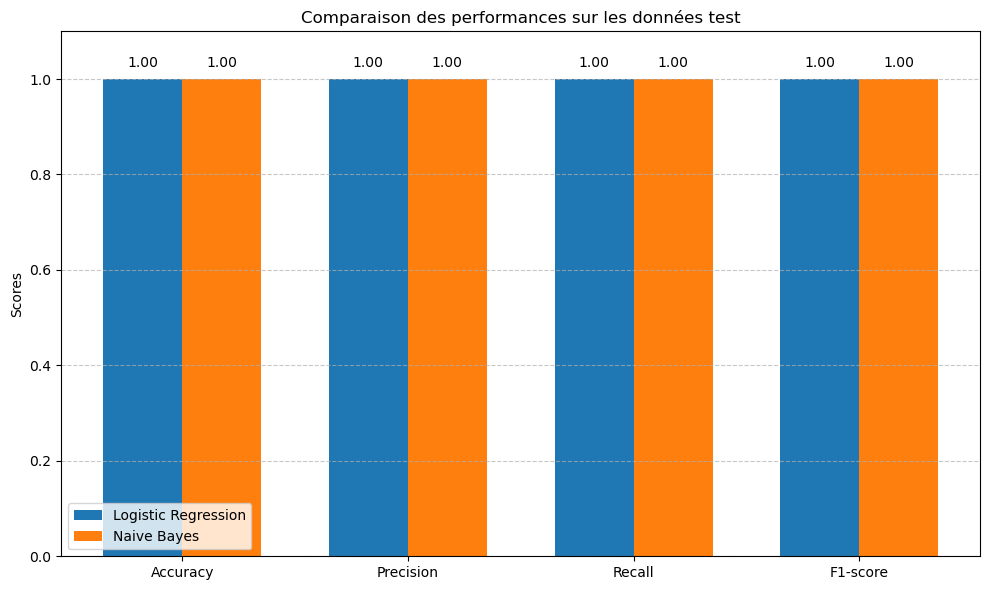

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Charger les données
data = load_iris()
X, y = data.data, data.target

# On réduit à une classification binaire (ex : class 0 vs 1)
X = X[y != 2]
y = y[y != 2]

# 2. Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Définir les modèles
log_model = LogisticRegression()
nb_model = GaussianNB()

# 4. Validation croisée (5-folds) sur les données d'entraînement
log_cv_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"[Validation] Logistic Regression Accuracy (mean over 5 folds): {log_cv_scores.mean():.4f}")
print(f"[Validation] Naive Bayes Accuracy (mean over 5 folds): {nb_cv_scores.mean():.4f}")

# 5. Entraînement final sur le train complet
log_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# 6. Prédiction
y_pred_log = log_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

# 7. Évaluation
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"[Test] {name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")
    return acc, prec, rec, f1

acc_log, prec_log, rec_log, f1_log = evaluate_model("Logistic Regression", y_test, y_pred_log)
acc_nb, prec_nb, rec_nb, f1_nb = evaluate_model("Naive Bayes", y_test, y_pred_nb)

# 8. Graphique comparatif
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
log_scores = [acc_log, prec_log, rec_log, f1_log]
nb_scores = [acc_nb, prec_nb, rec_nb, f1_nb]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, log_scores, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, nb_scores, width, label='Naive Bayes')

ax.set_ylabel('Scores')
ax.set_title('Comparaison des performances sur les données test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les scores sur les barres
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("Comparaison des performances sur les donnees test")
plt.show()
